In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pycircstat2 import Circular, load_data
from pycircstat2.clustering import MoVM

# Clustering circular data with a mixture of von Mises distributions

Here, we use dataset B3 from Fisher (1993) to demonstrate the usage of MoVM (Mixture of von Mises), as it is also the example shown in Jammalamadaka & Vaidyanathan (2024).

In [2]:
d = load_data("B3", source="fisher")["θ"].values
model = MoVM(n_clusters=2, unit="degree")
model.fit(d)

In [3]:
μ2, μ1 = np.rad2deg(model.m).round(4)
κ2, κ1 = model.kappa.round(4)
p2, p1 = model.p.round(4)

print(f"μ1 = {μ1:.4f}, μ2 = {μ2:.4f}")
print(f"κ1 = {κ1:.4f}, κ2 = {κ2:.4f}")
print(f"p1 = {p1:.2f}, p2 = {p2:.2f}")

# from Jammalamadaka & Vaidyanathan (2024)
# μ1​=241.2036∘; μ2​=63.4716∘;  
# κ1=8.4465; κ2=2.6187;  
# p1=0.16; p2​=0.84.  


μ1 = 241.1973, μ2 = 63.4706
κ1 = 8.4559, κ2 = 2.6090
p1 = 0.16, p2 = 0.84


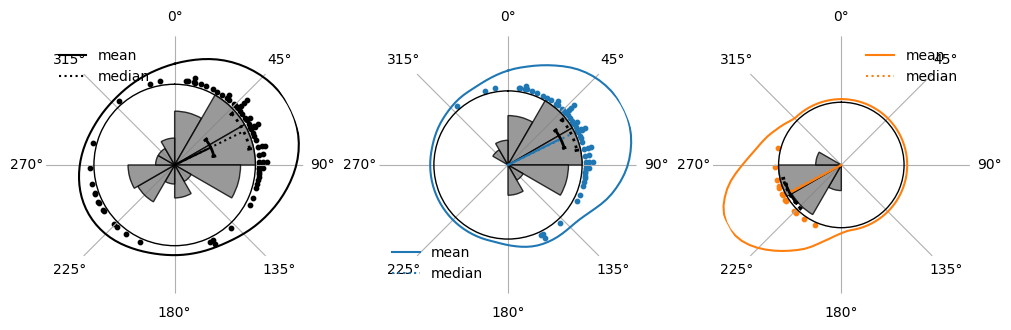

In [ ]:
labels = ["A", "B", "C"]
fig, ax = plt.subplot_mosaic(
    mosaic="ABC", figsize=(10, 5), 
    subplot_kw={"projection": "polar"},
    layout="constrained",
)

# complete data
c = Circular(d)
c.plot(ax=ax["A"])

for i, k in enumerate(range(2)):

    # clustered data    
    x_k = model.x[model.labels == k]
    c_k = Circular(data=x_k, unit=model.unit)

    c_k.plot(
        ax=ax[labels[i+1]], 
        config={
            "density": {"color": f"C{i}"},
            "scatter": {"color": f"C{i}"},
            "mean": {"color": f"C{i}"},
            "median": {"color": f"C{i}"},
        }
    )

    

`MoVM` is actually already built into the `Circular` class as an exploratory tool. By setting `n_clusters_max` when initializing the `Circular` data object, `MoVM` will run `n_clusters_max` times, from 1 to `n_clusters_max`, and select the model with the lowest BIC as the optimal number of clusters.

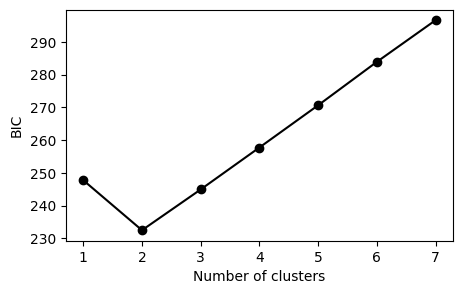

In [5]:
c = Circular(d, n_clusters_max=7)

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(range(1, 8), c.mixtures_BIC, marker="o", c="black")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("BIC")
plt.show()

In the dataset summary, the clustering result will be displayed on the second line (Unimodal?):

In [6]:
print(c.summary())

Circular Data

Summary
-------
  Grouped?: No
  Unimodal?: No (n_clusters=2) 
  Unit: degree
  Sample size: 76
  Angular mean: 64.17 ( p=0.0000 *** ) 
  Angular mean CI (0.95): 50.85 - 77.49
  Angular median: 64.00 
  Angular median CI (0.95): 48.00 - 78.00
  Angular deviation (s): 57.46 
  Circular standard deviation (s0): 67.74 
  Concentration (r): 0.50
  Concentration (kappa): 1.14
  Skewness: -0.082
  Kurtosis: 1.657

Signif. codes:
--------------
 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Method
------
  Angular median: deviation
  Angular mean CI: dispersion



In [7]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-02-18 18:17:24CET

Python implementation: CPython
Python version       : 3.12.9
IPython version      : 8.31.0

pycircstat2: 0.1.9
numpy      : 2.2.2
matplotlib : 3.10.0

Watermark: 2.5.0

